# Exercise 2: Sinusoids and the DFT

Doing this exercise you will get a better understanding of the basic elements and operations that take place in the Discrete Fourier Transform (DFT). There are five parts: 1) Generate a sinusoid, 2) Generate a complex sinusoid, 3) Implement the DFT, 4) Implement the IDFT, and 5) Compute the magnitude spectrum of an input sequence.

### Relevant Concepts

A real sinusoid in discrete time domain can be expressed by:

\begin{equation}
x[n] = A\cos(2 \pi fnT + \varphi)
\end{equation}

where, $x$ is the array of real values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $f$ is the frequency value of the sinusoid in Hz, $T$ is the sampling period equal to $1/fs$, fs is the sampling frequency in Hz, and $\varphi$ is the initial phase of the sinusoid in radians.

A complex sinusoid in discrete time domain can be expressed by:

\begin{equation}
\bar{x}[n] = Ae^{j(\omega nT + \varphi)} = A\cos(\omega nT + \varphi)+ j A\sin(\omega nT + \varphi)
\end{equation}

where, $\bar{x}$ is the array of complex values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $e$ is the complex exponential number, $\omega$ is the frequency of the sinusoid in radians per second (equal to $2 \pi f$), $T$ is the sampling period equal $1/fs$, fs is the sampling frequency in Hz and $\varphi$ is the initial phase of the sinusoid in radians.

The $N$ point DFT of a sequence of real values $x$ (a sound) can be expressed by:

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n]e^{-j2 \pi kn/N}  \hspace{1cm} k=0,...,N-1
\end{equation}

where $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the DFT.

The IDFT of a spectrum $X$ of length $N$ can be expressed by:

\begin{equation}
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k]e^{j2 \pi kn/N}  \hspace{1cm} n=0,...,N-1
\end{equation}

where, $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the spectrum $X$.

The magnitude of a complex spectrum $X$ is obtained by taking its absolute value: $|X[k]| $


## Part 1 - Generate a sinusoid

The function `gen_sine()` should generate a real sinusoid (use `np.cos()`) given its amplitude `A`, frequency `f` (Hz), initial phase `phi` (radians), sampling rate `fs` (Hz) and duration `t` (seconds). 

All the input arguments to this function `(A, f, phi, fs and t)` are real numbers such that `A`, `t` and `fs` are positive, and `fs > 2*f` to avoid aliasing. The function should return a numpy array `x` of the generated sinusoid. 

Use the function `cos` of the numpy package to compute the sinusoidal values.

In [1]:
import numpy as np

In [2]:
# E2 - 1.1: Complete function gen_sine()
def gen_sine(A, f, phi, fs, t):
    """Generate a real sinusoid given its amplitude, frequency, initial phase, sampling rate, and duration.
    Acos(2πfnT + φ)
    Args:
        A (float):  amplitude of the sinusoid
        f (float): frequency of the sinusoid in Hz
        phi (float): initial phase of the sinusoid in radians
        fs (float): sampling frequency of the sinusoid in Hz
        t (float): duration of the sinusoid (is second)
        
    Returns:
        np.array: array containing generated sinusoid
        
    """

    n = np.arange(0, t, 1/fs) 
    x = 2*(np.pi)*f*n + phi
    y = A*np.cos(x)
    return y

    

If you use `A=1.0, f = 10.0, phi = 1.0, fs = 50` and `t = 0.1` as input to the function `gen_sine()` the output numpy array should be:

```
array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])
```

To generate a sinewave that you can hear, it should be longer and with a higher sampling rate. For example you can use `A=1.0, f = 440.0, phi = 1.0, fs = 5000` and `t = 0.5`. To play it import the `Ipython.display` package and use `ipd.display(ipd.Audio(data=x, rate=fs))`.

array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])


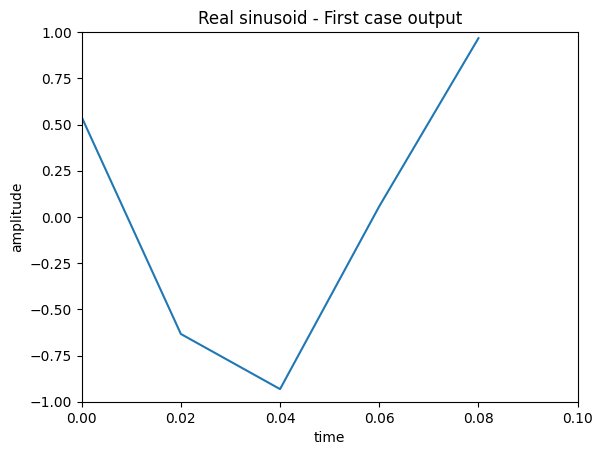

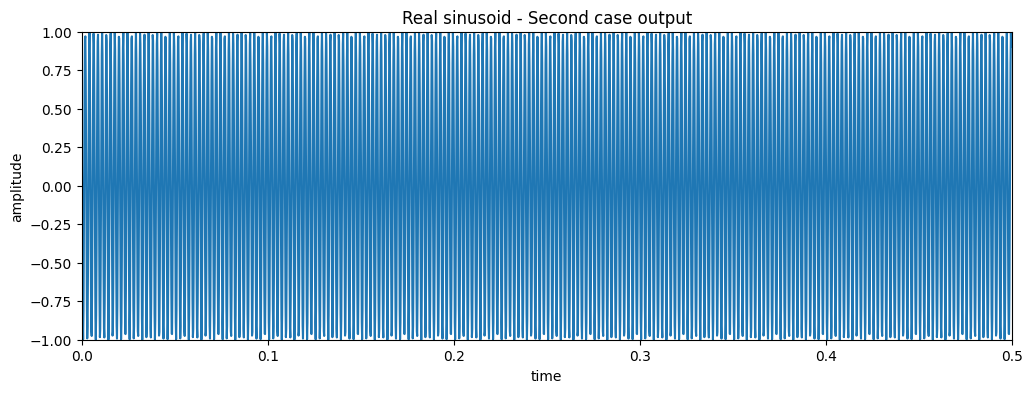

In [4]:
# E2 - 1.2: Call the function gen_sine() with the values proposed above, plot and play the output sinusoid

import IPython.display as ipd
import matplotlib.pyplot as plt
#First case
A1=1.0
f1= 10.0
phi1 = 1
fs1 = 50
t1 = 0.1
x1 = gen_sine(A1, f1, phi1, fs1, t1)
print(repr(x1))
n1 = np.arange(0, t1, 1/fs1)
plt.plot(n1,x1)
plt.axis([0, t1, -A1, A1])
plt.xlabel('time',)
plt.ylabel('amplitude')
plt.title('Real sinusoid - First case output')
plt.show()
#Second case
A2=1.0
f2= 440.0
phi2 = 1
fs2 = 5000
t2 = 0.5
x2 = gen_sine(A2, f2, phi2, fs2, t2)
#print(repr(x2))
n2 = np.arange(0, t2, 1/fs2)
plt.figure(figsize=(12, 4))
plt.plot(n2,x2)
plt.axis([0, t2, -A2, A2])
plt.xlabel('time',)
plt.ylabel('amplitude')
plt.title('Real sinusoid - Second case output')
plt.show()
ipd.display(ipd.Audio(data=x2, rate=fs2))


## Part 2 - Generate a complex sinusoid 

The `gen_complex_sine()` function should generate the complex sinusoid that is used in DFT computation of length `N` (samples), corresponding to the frequency index `k`. [Note that in the DFT we use the conjugate of this complex sinusoid.]

The amplitude of such a complex sinusoid is `1`, the length is `N`, and the frequency in radians is `2*pi*k/N`.

The input arguments to the function are two positive integers, `k` and `N`, such that `k < N-1`. The function should return `c_sine`, a numpy array of the complex sinusoid. Use the function `exp()` of the numpy package to compute the complex sinusoidal values.

In [3]:
# E2 - 2.1: Complete the function gen_complex_sine()
import numpy as np
def gen_complex_sine(k, N):
    """Generate one of the complex sinusoids used in the DFT from its frequency index and the DFT lenght.
    
    Args:
        k (integer): frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid, DFT length, in samples
        
    Returns:
        np.array: array with generated complex sinusoid (length N)
        
    """
    ### your code here
    n = np.arange(0, k, 1/N) 
    if k < (N-1):
     c_sine = np.exp(2j*np.pi*n)
    else:
       print("Value k should be less than N-1") 
    return c_sine


If you run the function `gen_complex_sine()` using `k=1` and `N=5`, it should return the following numpy array:

```
array([ 1. + 0.j,  0.30901699 + 0.95105652j, -0.80901699 + 0.58778525j, -0.80901699 - 0.58778525j, 0.30901699 - 0.95105652j])
```

array([ 1.        +0.j        ,  0.30901699+0.95105652j,
       -0.80901699+0.58778525j, -0.80901699-0.58778525j,
        0.30901699-0.95105652j])


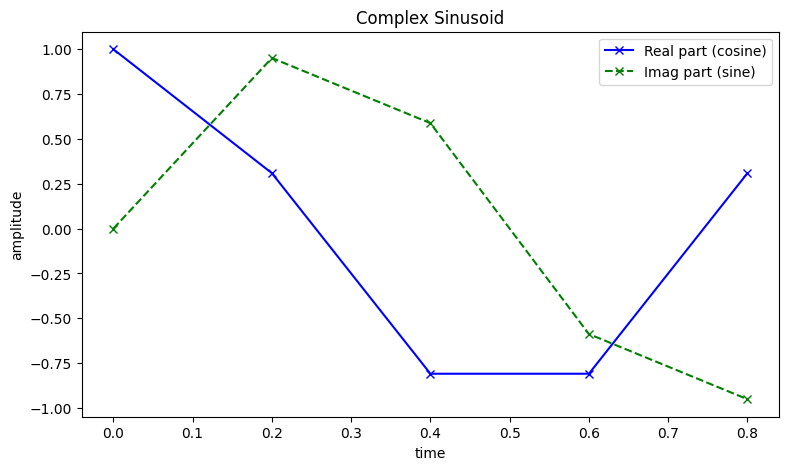

In [4]:
# E2 - 2.2: Call gen_complex_sine() with the values suggested above and plot the real and imaginary parts of the 
# output complex sinusoid

### your code here
import matplotlib.pyplot as plt
k = 1
N = 5
y = gen_complex_sine(k,N)
print(repr(y))
#n = np.arange(0, k, 1/N) 
n = np.arange(0, k, 1/N)
plt.figure(figsize=(9, 5))
plt.plot(n, np.real(y), 'b-x', label='Real part (cosine)')
plt.plot(n, np.imag(y), 'g--x', label='Imag part (sine)')

plt.title("Complex Sinusoid")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
plt.show()


## Part 3 - Implement the discrete Fourier transform (DFT)

The function `dft()` should implement the discrete Fourier transform (DFT) equation given above. Given a sequence `x` of length `N`, the function should return its spectrum of length `N` with the frequency indexes ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array `X`, the DFT of `x`.

In [7]:
# E2 - 3.1: Complete the function dft()
import numpy as np
import math 
def dft(x):
    """Compute the DFT of a signal.
    
    Args:
        x (numpy array): input sequence of length N
        
    Returns:
        np.array: N point DFT of the input sequence x
    """
    N = len(x)
    X= np.array([])
    for k in range(N):
        s = np.exp(2j*np.pi*k/N*np.arange(N)) 
        X = np.append(X, sum(x*np.conjugate(s)))

    return X

If you run `dft()` using as input `x = np.array([1, 2, 3, 4])`, the function shoulds return the following numpy array:

```
array([10.0 + 0.0j,  -2. +2.0j,  -2.0 - 9.79717439e-16j, -2.0 - 2.0j])
```

Note that you might not get an exact 0 in the output because of the small numerical errors due to the limited precision of the data in your computer. Usually these errors are of the order 1e-15 depending on your machine.

array([10.+0.00000000e+00j, -2.+2.00000000e+00j, -2.-9.79717439e-16j,
       -2.-2.00000000e+00j])


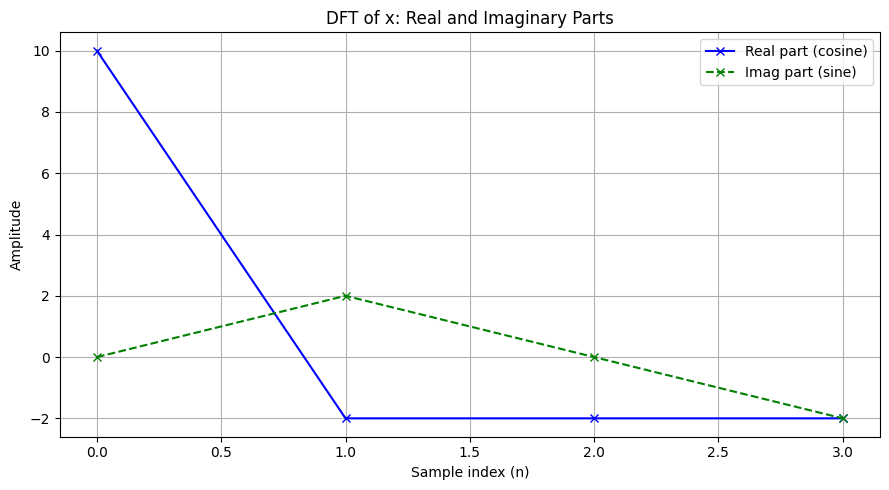

In [8]:
# E2 - 3.2: Call dft() with the values suggested above and plot the real and imaginary parts of output spectrum.

### your code here
x = np.array([1, 2, 3, 4])
X = dft(x)
N = len(X)
print(repr(X))
n = np.arange(N) 
plt.figure(figsize=(9, 5))
plt.plot(n, np.real(X), 'b-x', label='Real part (cosine)')
plt.plot(n, np.imag(X), 'g--x', label='Imag part (sine)')

plt.title("DFT of x: Real and Imaginary Parts")
plt.xlabel("Sample index (n)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show() 


## Part 4 - Implement the inverse discrete Fourier transform (IDFT)

The function `idft()` should implement the inverse discrete Fourier transform (IDFT) equation given above. Given a frequency spectrum `X` of length `N`, the function should return its IDFT `x`, also of length `N`. Assume that the frequency index of the input spectrum ranges from 0 to `N-1`.

The input argument to the function is a numpy array `X` of the frequency spectrum and the function should return a numpy array of the IDFT of `X`.

Remember to scale the output appropriately.

In [9]:
# E2 - 4.1: Complete the function idft()
import math
import numpy as np
def idft(X):
    """Compute the inverse-DFT of a spectrum.
    
    Args:
        X (np.array): frequency spectrum (length N)
        
    Returns:
        np.array: N point IDFT of the frequency spectrum X
        
    """
    ### Your code here
    N = len(X)
    n = np.arange(0, N,1) 
    x = (1/N)*sum(X[k]*(np.exp(2j*math.pi*k*n/N)) for k in range(N)) 
    return x


If you run `idft()` with the input `X = np.array([1, 1, 1, 1])`, the function should return the following numpy array: 

```
array([  1.00000000e+00 +0.00000000e+00j,   -4.59242550e-17 +5.55111512e-17j,   0.00000000e+00 +6.12323400e-17j,   8.22616137e-17 +8.32667268e-17j])
```

Notice that the output numpy array is essentially `[1, 0, 0, 0]`. Instead of exact 0 we get very small numerical values of the order of 1e-15, which can be ignored. Also, these small numerical errors are machine dependent and might be different in your case.

In addition, an interesting test of the IDFT function can be done by providing the output of the DFT of a sequence as the input to the IDFT. See if you get back the original time domain sequence.

array([ 1.00000000e+00+0.00000000e+00j, -4.59242550e-17+5.55111512e-17j,
        0.00000000e+00+6.12323400e-17j,  8.22616137e-17+8.32667268e-17j])
DFT for validation: array([1, 1, 1, 1])


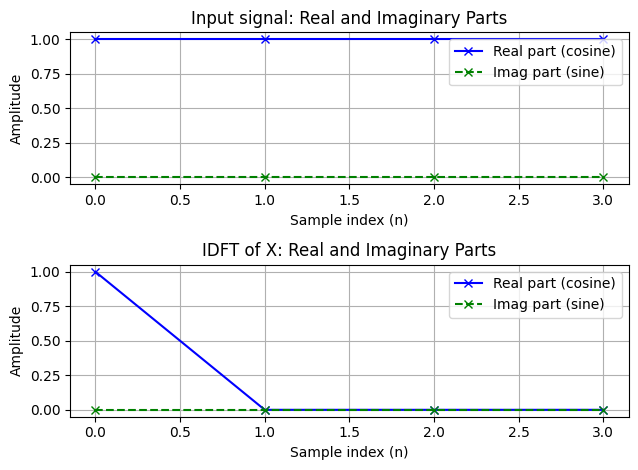

In [18]:
# E2 - 4.2: Plot input spectrum (real and imaginary parts) suggested above, call idft(), plot output signal 
# (real and imaginary parts), compute the dft() of the output signal to validate that you get back the input spectrum.
import numpy as np
### Your code here
y = np.array([1, 1, 1, 1])
x = idft(y)
print(repr(x))

#compute the dft for validation
val = dft(y)
print(f"DFT for validation:",repr(y))


N = len(x)
n = np.arange(0,N) 
plt.subplot(211)
plt.plot(n, np.real(y), 'b-x', label='Real part (cosine)')
plt.plot(n, np.imag(y), 'g--x', label='Imag part (sine)')
plt.title("Input signal: Real and Imaginary Parts")
plt.xlabel("Sample index (n)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.subplot(212)
plt.plot(n, np.real(x), 'b-x', label='Real part (cosine)')
plt.plot(n, np.imag(x), 'g--x', label='Imag part (sine)')
plt.title("IDFT of X: Real and Imaginary Parts")
plt.xlabel("Sample index (n)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



## Part 5 - Compute the magnitude spectrum

The function `gen_mag_spectrum()` should compute the magnitude spectrum of an input sequence `x` of length `N`. The function should return an `N` point magnitude spectrum with frequency index ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array of the magnitude spectrum of `x`.

In [12]:
# E2 - 5.1: Complete the function gen_mag_spec()
import math
def gen_mag_spec(x):
    """Compute magnitude spectrum of a signal.
    
    Args:
        x (np.array): input sequence of length N
        
    Returns:
        np.array: magnitude spectrum of the input sequence x (length N)
        
    """
   
    y = dft(x)
    mag = np.abs(y)
    return mag

If you run `gen_mag_spec()` using as input `x = np.array([1, 2, 3, 4])`, it should return the following numpy array:
```
array([10.0, 2.82842712, 2.0, 2.82842712])
```
For a more realistic use of `gen_mag_spec()` use as input a longer signal, such as `x = np.cos(2*np.pi*200.0*np.arange(512)/1000)`, and to get a visual representation of the input and output, import the `matplotlib.pyplot` package and use `plt.plot(x)` and `plt.plot(X)`.

In [13]:
import IPython.display as ipd
import matplotlib.pyplot as plt

array([10.        ,  2.82842712,  2.        ,  2.82842712])
Peak k frequency bins: [102 410]
Peak frequencies (Hz): [199.21875 800.78125]


c:\Users\despn\Downloads\sms-tools-materials-main\sms-tools-materials-main\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\despn\Downloads\sms-tools-materials-main\sms-tools-materials-main\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


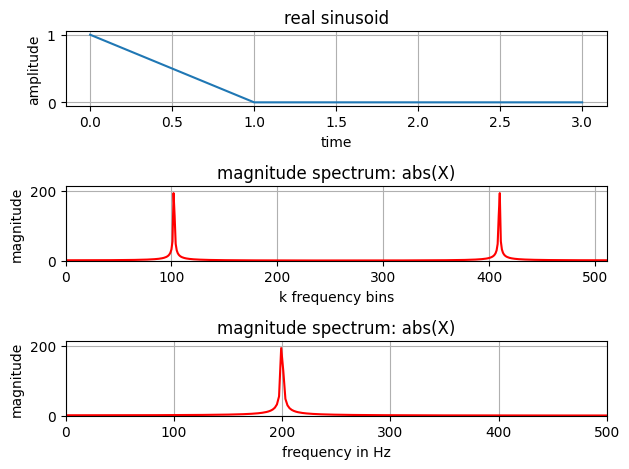

In [14]:
# E2 - 5.2: Plot input cosine signal suggested above, call gen_mag_spec(), and plot the output result. 
# Validate that the peak of the magnitude spectrum corrresponds to the frequency of the sinusoid.


x1 = np.array([1, 2, 3, 4])
mag1 = gen_mag_spec(x1)
print(repr(mag1))


x2 = np.cos(2*np.pi*200.0*np.arange(512)/1000)
mag2 = gen_mag_spec(x2)


#Validate that the peak corresponds to the input frequency
peak_k = np.argsort(mag2)[-2:] 
peak_k = np.sort(peak_k) #

# Convert to frequency in Hz
peak_freqs = peak_k * 1000 / 512

print("Peak k frequency bins:", peak_k)
print("Peak frequencies (Hz):", peak_freqs)

#Plot input
plt.subplot(311)
N = len(x)
plt.plot(x[:512])
#plt.axis([0, 0.1, -1, 1])
plt.xlabel('time',)
plt.ylabel('amplitude')
plt.title('real sinusoid')
plt.grid(True)

#Plot of the magnitude and phase of DFT
#x-axis responds to k not fk
plt.subplot(312)
N = len(mag2)
plt.title('magnitude spectrum: abs(X)')
plt.xlabel('k frequency bins',)
plt.ylabel('magnitude')
plt.plot(np.arange(N), mag2, 'r', ms=5, lw=1.5)
plt.axis([0, N-1, 0, max(mag2)*1.1])
plt.grid(True)

#plot real cosine
plt.subplot(313)
plt.title('magnitude spectrum: abs(X)')
plt.xlabel('frequency in Hz',)
plt.ylabel('magnitude')
plt.plot(np.arange(N) * 1000 / 512, mag2, 'r', ms=5, lw=1.5)
plt.axis([0, 1000/2, 0, max(mag2)*1.1])
plt.grid(True)


plt.tight_layout()
plt.show()




**Question E2 - 5.3:**

### Explain the plot shown, specially in terms of frequency and amplitude values, compared with the values of the sinusoid you started with.
First, by seeing the input x2 = np.cos(2*np.pi*200.0*np.arange(512)/1000) and comparing it to the general real sinusoid expression, we can assume that A=1, f0 = 200 Hz, fs = 1000 Hz and N = 512. In the first plot we can see our input cosine signal for 512 samples with amplitude 1, as expected from the input signal.

In the second plot, we see the magnitude spectrum of the DFT of the input signal, shown with frequency bins k in the x axis. As we can see, there are two peaks in different frequency bins, even though the input is only one sinusoid. This happens because the real cosine, is the sum of two complex conjugate exponentials. Both spikes correspond to the same sinusoidal component in the original time signal, so the mirrored spike is redundant and provides the same information. For this reason, when we picture real sinusoids we usually consider only the first half of the spectrum [0,N/2]. 

We can also notice that the magnitude of these spikes is almost 200, which differs from the expected amplitude of 1. This happens because the DFT is not normalized and the number we get as magnitude is equal to the number of samples divided by 2. The reason is again related to the cosine being the sum of two complex conjugate exponentials, each having a magnitude of N/2. In this case, it should be 512/2 = 256 but it's 200, which is probably because of spectral leakage. Lastly, the spikes are not centered around 0 but around the midpoint, which corresponds to the Nyquist frequency. If we want to center the plot around 0, we need to reshape out time index in the frame [-N/2,N/2] instead of [0, N-1].

In the second plot, the x-axis represents frequency in Hz, computed from the frequency bins k. We can see that the spike of the magnitude corresponds almost to the right frequency of the input signal (fk = 200 Hz, computed frequency= 199.21875).
​The second spike still exists, but it's not plotted. The reason we plot in the frame [0, fs/2] is because every information that exceeds the Nyquist frequency fN = fs / 2 = 500 Hz, responds to negative frequencies and it's redundant for the same reasons mentioned in the previous plot. 